In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class data_preprocess:
    def __init__(self):
        self.window_size = 300
        
    def load_dataset(self, path):
        df = pd.read_csv(path)
        # print('\nColumns of df:\n', df.columns)
        print('\nInitial value counts for key columns:')
        for col in ['Age', 'Education', 'Income', 'Smoker', 'Diabetes_binary']:
            if col in df.columns:
                print(f"\n{col}:\n{df[col].value_counts(dropna=False)}")
        return df[:self.window_size]

    def plots_func(self, df):
        
        # 1. Bar Graph: Proportion of Diabetic vs Non-Diabetic individuals
        plt.figure(figsize=(6, 4))
        sns.countplot(x='Diabetes_binary', data=df)
        plt.title('Diabetes Distribution (Binary: 0 = No, 1 = Yes)')
        plt.xlabel('Diabetes Binary')
        plt.ylabel('Count')
        plt.show()

        # 2. Histogram: Distribution of BMI across diabetic and non-diabetic individuals
        plt.figure(figsize=(6, 4))
        sns.histplot(df[df['Diabetes_binary'] == 1]['BMI'], color='red', kde=True, label='Diabetic', bins=20)
        sns.histplot(df[df['Diabetes_binary'] == 0]['BMI'], color='green', kde=True, label='Non-Diabetic', bins=20)
        plt.title('BMI Distribution: Diabetic vs Non-Diabetic')
        plt.xlabel('BMI')
        plt.ylabel('Density')
        plt.legend()
        plt.show()
        
        # 3. Pie Chart: Distribution of people with high blood pressure (HighBP)
        highbp_counts = df['HighBP'].value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(highbp_counts, labels=['No HighBP', 'HighBP'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
        plt.title('Proportion of People with High Blood Pressure')
        plt.show()
        
        # 4. Boxplot: Distribution of Age across diabetic and non-diabetic individuals
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='Diabetes_binary', y='Age', data=df, hue='Diabetes_binary')
        plt.title('Age Distribution by Diabetes Status')
        plt.xlabel('Diabetes Status')
        plt.ylabel('Age')
        plt.show()

        # 5. Correlation Heatmap: Correlations between numeric features
        plt.figure(figsize=(8, 6))
        corr_matrix = df[['BMI', 'Age', 'HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title('Correlation Heatmap of Health Factors')
        plt.show()
        
        # 6. Countplot: Proportion of smokers vs non-smokers in diabetic and non-diabetic individuals
        plt.figure(figsize=(6, 4))
        sns.countplot(x='Smoker', hue='Diabetes_binary', data=df)
        plt.title('Smokers vs Non-Smokers: Diabetic vs Non-Diabetic')
        plt.xlabel('Smoker Status')
        plt.ylabel('Count')
        plt.show()
        
        # 7. Pairplot: Pairwise relationships between BMI, Age, and Diabetes status
        sns.pairplot(df[['BMI', 'Age', 'Diabetes_binary']], hue='Diabetes_binary')
        plt.title('Pairwise Plot of BMI, Age and Diabetes Status')
        plt.show()

    def clean_datasets(self, loaded):
        print('\nOriginal value counts before mapping:')
        print(loaded['Diabetes_binary'].value_counts(dropna=False))
        
        # First handle binary columns - many are likely already 0/1
        binary_cols = {
            'Smoker': {'No': 0, 'Yes': 1},
            'Stroke': {'No': 0, 'Yes': 1},
            'HeartDiseaseorAttack': {'No': 0, 'Yes': 1},
            'PhysActivity': {'No': 0, 'Yes': 1},
            'Fruits': {'No': 0, 'Yes': 1},
            'Veggies': {'No': 0, 'Yes': 1},
            'HvyAlcoholConsump': {'No': 0, 'Yes': 1},
            'AnyHealthcare': {'No': 0, 'Yes': 1},
            'NoDocbcCost': {'No': 0, 'Yes': 1},
            'DiffWalk': {'No': 0, 'Yes': 1},
            'Sex': {'Male': 1, 'Female': 0},
            'Diabetes_binary': {'No': 0, 'Yes': 1}
        }
        
        for col, mapping in binary_cols.items():
            if col in loaded.columns:
                # Check if values are already numeric
                if loaded[col].dtype in ['int64', 'float64']:
                    # print(f"{col} appears to already be numeric - skipping mapping")
                    continue
                # Apply mapping with fillna for unmatched values
                loaded[col] = loaded[col].map(mapping).fillna(loaded[col])
                print(f"\nAfter mapping {col}:\n{loaded[col].value_counts(dropna=False)}")
        
        # Handle ordinal columns
        ordinal_maps = {
            'Age': {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5,
                    '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12},
            'Education': {'Some college': 0, 'Bachelors degree': 1, 'Graduate degree': 2},
            'Income': {'<$15,000': 0, '$15,000-$24,999': 1, '$25,000-$34,999': 2, 
                      '$35,000-$44,999': 3, '$45,000-$54,999': 4, '$55,000-$64,999': 5, 
                      '$65,000-$74,999': 6, '$75,000+': 7},
        }
        
        for col, mapping in ordinal_maps.items():
            if col in loaded.columns:
                # First check if already numeric
                if loaded[col].dtype in ['int64', 'float64']:
                    # print(f"{col} appears to already be numeric - skipping mapping")
                    continue
                    
                print(f"\nBefore mapping {col}:\n{loaded[col].value_counts(dropna=False)}")
                loaded[col] = loaded[col].map(mapping).fillna(loaded[col])
                print(f"\nAfter mapping {col}:\n{loaded[col].value_counts(dropna=False)}")
        
        # Verify no NaNs remain
        print("\nNaN values after cleaning:")
        print(loaded.isna().sum())

        
        self.plots_func(loaded)
        
        try:
            loaded['Sex_Male'] = loaded['Sex']
            loaded['Sex_Female'] = 1 - loaded['Sex']
            loaded.to_csv(r'C:\Users\ISO\Desktop\ssh\powerBI_exam.csv', index=False)
            print( 'Successfully save the powerBI csv file')
        except Exception as e:
            print('Error saving powerBI csv')
        
        return loaded

    def grouping_ill(self, cleaned):
        # Your existing risk calculations
        cleaned['diabetes_risk'] = ((cleaned['BMI'] > 30) | 
                                   (cleaned['HighBP'] == 1) | 
                                   (cleaned['HighChol'] == 1) | 
                                   (cleaned['GenHlth'] < 3) | 
                                   (cleaned['Smoker'] == 1) | 
                                   (cleaned['PhysActivity'] == 0)).astype(int)
        
        cleaned['cardiovascular_disease_risk'] = ((cleaned['HeartDiseaseorAttack'] == 1) | 
                                                (cleaned['HighBP'] == 1) | 
                                                (cleaned['HighChol'] == 1) | 
                                                (cleaned['Smoker'] == 1) | 
                                                (cleaned['HvyAlcoholConsump'] == 1) | 
                                                (cleaned['Age'] > 45)).astype(int)
        
        cleaned['stroke_risk'] = (cleaned['Stroke'] == 1).astype(int)
        cleaned['obesity_risk'] = (cleaned['BMI'] > 30).astype(int)
        cleaned['mental_health_risk'] = ((cleaned['MentHlth'] > 15) | 
                                       (cleaned['GenHlth'] < 3) | 
                                       (cleaned['DiffWalk'] == 1)).astype(int)
        cleaned['physical_health_risk'] = ((cleaned['PhysHlth'] > 15) | 
                                         (cleaned['GenHlth'] < 3) | 
                                         (cleaned['PhysActivity'] == 0)).astype(int)
        cleaned['hypertension_risk'] = (cleaned['HighBP'] == 1).astype(int)
        cleaned['high_cholesterol_risk'] = (cleaned['HighChol'] == 1).astype(int)
        cleaned['cancer_risk'] = ((cleaned['Smoker'] == 1) | 
                                 (cleaned['HvyAlcoholConsump'] == 1) | 
                                 (cleaned['Age'] > 50)).astype(int)
        
        return cleaned

    def view_category(self, eng):
        available_groups = {}
        view_groups = {
            "Numerical_View": ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth'],
            "Categorical": ['Age', 'Education', 'Income'],
            "Behavioral": ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare'],
            "Medical_View": ['HighBP', 'HighChol', 'CholCheck'],
            "Psychological_View": ['MentHlth'],
            "Genetic_View": ['DiffWalk'],
            "Health_Status": ['Diabetes_binary', 'HeartDiseaseorAttack', 'Stroke']
        }
        
        for key, value in view_groups.items():
            present_col = [col for col in value if col in eng.columns]
            if not present_col:
                print(f"Warning: No columns found for group {key}")
                continue
                
            group_eng = eng[present_col].copy()
            
            # Check for NaN values
            if group_eng.isna().any().any():
                nan_cols = group_eng.columns[group_eng.isna().any()].tolist()
                print(f"Warning: NaN values in group {key}, columns: {nan_cols}")
                
            available_groups[key] = group_eng
         
        return available_groups

    def run(self, path=r'C:\Users\ISO\Desktop\ssh\diabetes_binary_5050split_health_indicators_BRFSS2015.csv'):
        load = self.load_dataset(path)
        clean = self.clean_datasets(load)
        eng = self.grouping_ill(clean)
        views = self.view_category(eng)
        return views, clean['Diabetes_binary']

# Run the processor
# views, target = data_preprocess().run()

In [2]:
!pip install torch
import torch
print(torch.__version__)

2.7.1+cpu


In [3]:
import torch.nn as nn
import torch

class PositionalEncoding(nn.Module):
    def __init__(self, view_dim, max_seq, d_model):
        super().__init__()
        self.d_model = d_model
        self.max_seq = max_seq
        self.pos_embed = nn.Parameter(torch.randn(1, self.max_seq, self.d_model))  # [1, max_seq, d_model]
        self.view_proj = nn.ModuleDict({
            name: nn.Linear(dim, self.d_model) for name, dim in view_dim.items()
        })
        self.norm = nn.LayerNorm(self.d_model)

    def forward(self, view_tensor):
        out = {}
        for name, tensor in view_tensor.items():
            # print(f'{name} input shape: {tensor.shape}')  # E.g., [300, 22]
            project_view = self.view_proj[name](tensor.unsqueeze(1) )
            # print('printed projected view ', project_view.shape)  # E.g., [300, 64]
            norm_projected_view = self.norm(project_view)
            # print('printed projected view normalization ', norm_projected_view.shape)  # E.g., [300, 64]
            
            # Fix: slice positional embedding along the sequence length, not the batch size
            # print(self.pos_embed[:, :1, :].shape)  # E.g., [1, 64, 64]
            out[name] = norm_projected_view + self.pos_embed[:, :1, :].squeeze(1)

        return out


In [4]:
import torch.nn as nn
import torch
class Transformer(nn.Module):
    def __init__(self, view_dim, d_model, num_head, num_layer, num_diseases, dropout=0.2):
        super().__init__()
        self.d_model = d_model
        self.num_head = num_head
        self.num_layer = num_layer
        self.dropout= dropout
        self.norm = nn.LayerNorm(d_model)
        self.encoder = nn.ModuleDict({
            name: nn.TransformerEncoder(
                nn.TransformerEncoderLayer(d_model, num_head, batch_first=True), num_layer
            ) for name in view_dim
        })
        self.decoder_layer = nn.TransformerDecoderLayer(d_model, num_head, batch_first=True)
        self.decoder = nn.TransformerDecoder(self.decoder_layer, num_layer)
        self.risk_head = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, num_diseases),
            nn.Dropout(self.dropout),
            nn.Sigmoid()
        )
        self.target_project = nn.Linear(1, d_model)
        
    def forward(self, view_tensor, target, virus=None):
        out = []
        for name, view in view_tensor.items():
            # print('in encoder print view shape', view.shape)
            enc = self.encoder[name](view)
            out.append(enc)
        sequence_enc = torch.stack(out, dim=1)
        # print(sequence_enc.squeeze(2).shape)
        # print(target.shape)
        # print(target.unsqueeze(1).shape)
        projected_target = self.target_project(target.unsqueeze(1))
        # print(projected_target.unsqueeze(1).shape)
        dec = self.decoder(projected_target.unsqueeze(1), sequence_enc.squeeze(2))
        # print(dec.shape)
        out = self.risk_head(dec)
        return out
            
        

In [5]:
!pip install scikit-learn

In [6]:
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
class Training(nn.Module):
    def __init__(self, model, risk_labels, lr=1e-6, weight_decay=2e-4):
        super().__init__()
        self.model = model
        self.risk_labels = risk_labels
        self.max_grad_norm = 1.0
        self.optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
        self.schedule = ReduceLROnPlateau(
            self.optimizer,
            patience = 3,
            factor = 0.5,
            min_lr = 1e-8)

    def save_model(self, path):
        torch.save({
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'scheduler_state_dict': self.scheduler.state_dict(),
        }, path)
    def load_model(self, path):
        checkpoint = torch.load(path, weights_only=True)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.scheduler.load_state_dict(checkpoint['scheduler_state_dict'])

    def calc_metrics(self, output, target, threshold=0.6):
        risks = {}
        print('output reached in metrics', output)
        print('target reached in metrics', target)
        for i in range(output.shape[0]):
            row_risks = {self.risk_labels[j]: output[i, j].item() for j in range(output.shape[1])}
            
            # Calculate the combined risk as a single scalar for the row
            combined_risk = torch.tensor(list(row_risks.values())).mean().item()  # Ensure this is a scalar
            # print(combined_risk)

             # Convert predictions to binary values (0 or 1) based on threshold
            pred_labels = (output[i] >= threshold).int().cpu().numpy()
            true_labels = target[i].cpu().numpy()

            # Calculate precision, recall, and F1-score
            precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
            recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
            f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)

            risks[i] = {
                'row_risk': row_risks,
                'combined_risk': combined_risk,
                'status': 0 if combined_risk >= threshold else 1,  # Healthy=0, Diseased=1
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                # 'roc_auc': auc
            }
        return risks


        
    def train(self, input_view, target_view):
        """ in real training we can add epoc loop for retrials  n """
        self.model.train()
        self.optimizer.zero_grad()
        train_preds = self.model(input_view, target_view)
        train_preds = train_preds.squeeze(1)  # Removes middle dim -> [300, 9]
        target_view = target_view.unsqueeze(1)
        print('train predictions\n', train_preds)
        train_loss = F.huber_loss(
            train_preds, 
            target_view.expand_as(train_preds),  # Broadcast target to match preds
            delta=1.0  # Threshold for Huber
        )
        train_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.max_grad_norm)
        self.optimizer.step()
        self.schedule.step(train_loss) # this will dynamically update the lr rate
        status = self.calc_metrics(train_preds, target_view.expand_as(train_preds))
        return {'loss': train_loss.item(), 'status': status }
                
                
            


Initial value counts for key columns:

Age:
Age
10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: count, dtype: int64

Education:
Education
6.0    26020
5.0    20030
4.0    19473
3.0     3447
2.0     1647
1.0       75
Name: count, dtype: int64

Income:
Income
8.0    20646
7.0    11425
6.0    10287
5.0     8010
4.0     6658
3.0     5557
2.0     4498
1.0     3611
Name: count, dtype: int64

Smoker:
Smoker
0.0    37094
1.0    33598
Name: count, dtype: int64

Diabetes_binary:
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

Original value counts before mapping:
Diabetes_binary
0.0    300
Name: count, dtype: int64

NaN values after cleaning:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorA

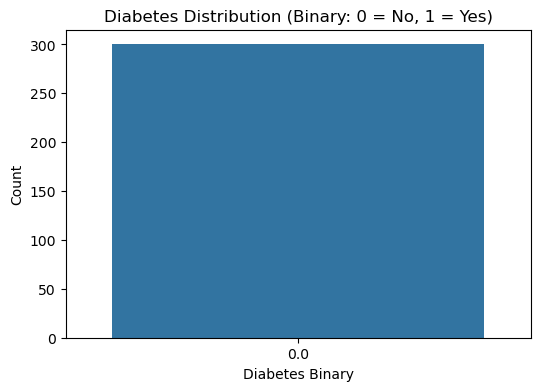

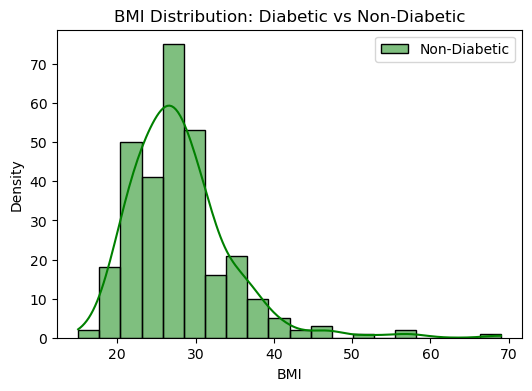

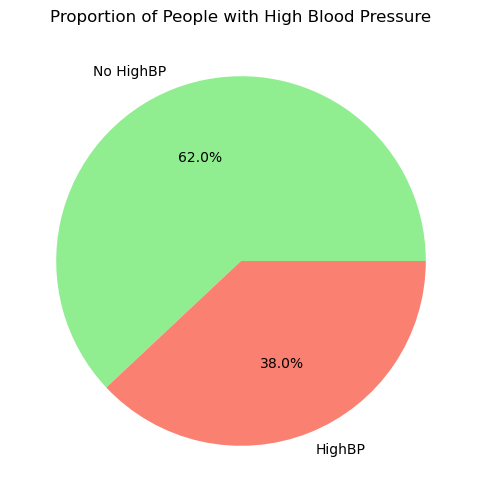

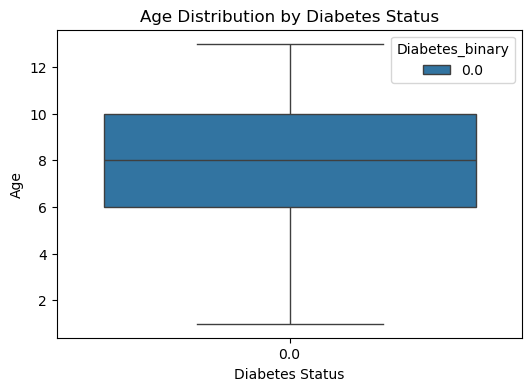

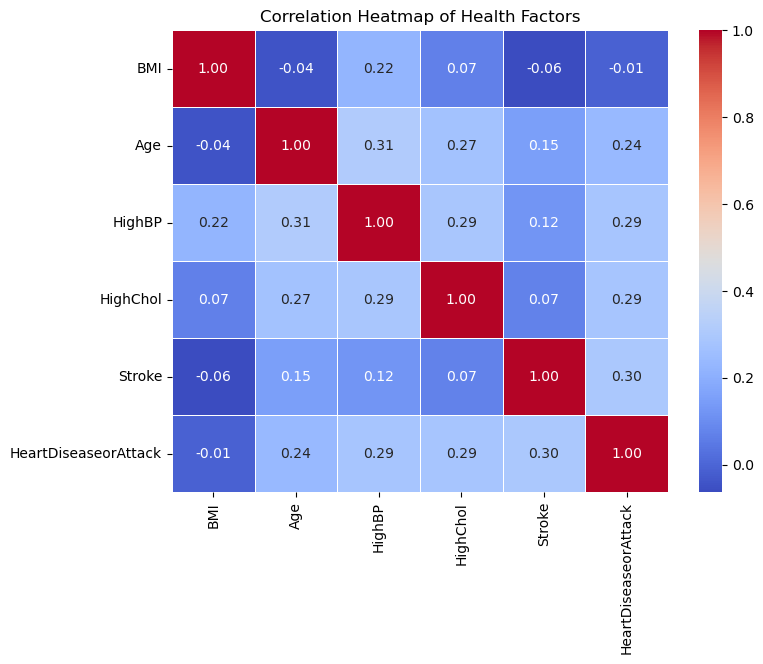

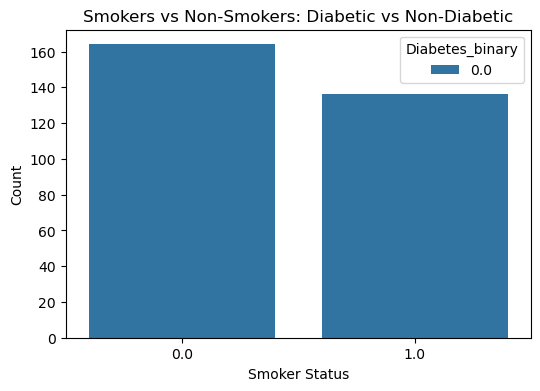

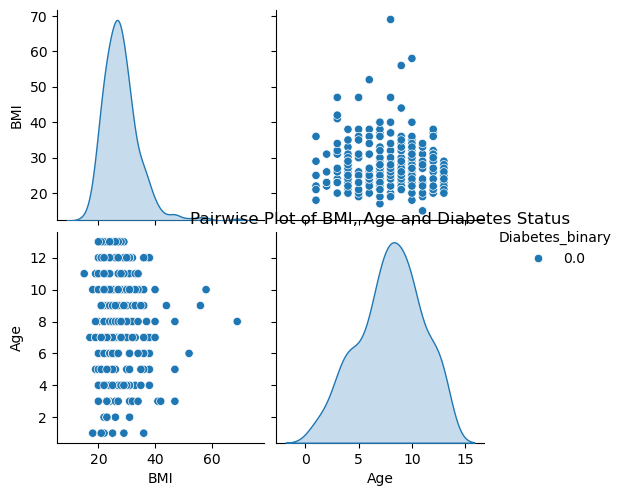

Successfully save the powerBI csv file
torch.Size([300])
train predictions
 tensor([[0.5000, 0.6818, 0.4221,  ..., 0.5934, 0.6785, 0.5000],
        [0.4687, 0.5662, 0.5000,  ..., 0.5569, 0.6569, 0.6951],
        [0.5000, 0.5912, 0.4570,  ..., 0.3809, 0.5972, 0.5000],
        ...,
        [0.4425, 0.5000, 0.4119,  ..., 0.5724, 0.5000, 0.6682],
        [0.4462, 0.6865, 0.5000,  ..., 0.4870, 0.5000, 0.6034],
        [0.5000, 0.6670, 0.4423,  ..., 0.5098, 0.5908, 0.5000]],
       grad_fn=<SqueezeBackward1>)
output reached in metrics tensor([[0.5000, 0.6818, 0.4221,  ..., 0.5934, 0.6785, 0.5000],
        [0.4687, 0.5662, 0.5000,  ..., 0.5569, 0.6569, 0.6951],
        [0.5000, 0.5912, 0.4570,  ..., 0.3809, 0.5972, 0.5000],
        ...,
        [0.4425, 0.5000, 0.4119,  ..., 0.5724, 0.5000, 0.6682],
        [0.4462, 0.6865, 0.5000,  ..., 0.4870, 0.5000, 0.6034],
        [0.5000, 0.6670, 0.4423,  ..., 0.5098, 0.5908, 0.5000]],
       grad_fn=<SqueezeBackward1>)
target reached in metrics tensor

In [7]:
import torch
class main:
    def __init__(self):
        self.model = None
        self.pos_enc = None
        self.d_model = 64
        self.max_seq = 100
        self.num_head = 4
        self.num_layer = 2
        self.batch_size = 1
        self.num_diseases = 9
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.risk_labels = ['target', 'diabetes_risk', 'heart_disease_risk', 'cancer_risk', 'ckd_risk',
                            'stroke_risk', 'obesity_risk', 'mental_health_risk', 'liver_disease_risk']
    def initialize(self, view):
        # self.load_model()  this is where i would load a model 
        self.pos_enc = PositionalEncoding(view, max_seq=self.max_seq, d_model=self.d_model)
        self.model = Transformer(view, d_model=self.d_model, num_head=self.num_head, num_layer=self.num_layer, num_diseases=self.num_diseases)
        self.Training = Training(self.model, risk_labels=self.risk_labels)

    def save_model(self, path):
        self.Training.save_model(path)
        print('Model saved in path', path)
    def load_model(self, path): # this loades model
        self.Training.load_model(path)
        print('Loaded model from path ', path)
    def transformer(self,pos_enc, target_col, mode):
        
        if mode == 'train':              
            model = self.Training.train(pos_enc, target_col)
            # self.save_model()   this is where i would save a model
            return model
        
    def decision(self, output):
        disease_advice = {
            'diabetes_risk': 'Manage blood sugar through diet and exercise.',
            'cardiovascular_disease_risk': 'Monitor blood pressure and cholesterol, avoid smoking.',
            'stroke_risk': 'Maintain healthy blood pressure and physical activity.',
            'obesity_risk': 'Adopt a balanced diet and increase exercise.',
            'mental_health_risk': 'Seek mental health support and manage stress.',
            'physical_health_risk': 'Increase physical activity and monitor general health.',
            'hypertension_risk': 'Control blood pressure through lifestyle changes.',
            'high_cholesterol_risk': 'Reduce cholesterol through diet and medication if needed.',
            'cancer_risk': 'Reduce smoking and alcohol, get regular screenings.'
        }
        advice = {}
        for disease, risk_value in output['row_risk'].items():
            if disease == 'target':
                continue
            if risk_value >= 0.5:  # Only provide advice for high-risk conditions
                advice[disease] = disease_advice.get(disease, 'Keep good health congz')

        return advice
    def run(self, split_ration=0.8):
        df, target_col = data_preprocess().run()
        views_dim = {name: d.shape[1] for name, d in df.items()} # the df has colummn names and list making it [7, 300]
        self.initialize(views_dim)
        view_tensor = {name: torch.tensor(view.values, dtype=torch.float32).to(self.device)
                       for name, view in df.items()}
        pos_enc = self.pos_enc(view_tensor) 
        target_tensor = torch.tensor(target_col.values, dtype=torch.float32).to(self.device)
        print(target_tensor.shape)
        risks = self.transformer(pos_enc, target_tensor, mode='train')
        print(f'='*100)
        last_key = list(risks['status'].keys())[-1]
        print('\nLast risk dictionary:\n')
        print(risks['status'][last_key])
        print("Training Summary:")
        print(f"Total Loss: {risks['loss']:.4f}")

        decision = self.decision(risks['status'][last_key])

        print("\nHealth Advice for Last Patient:")
        for disease, advice in decision.items():
            print(f"{disease}: {advice}")
     


        
main().run()
